In [1]:
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
steel_rank = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood_rank = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

In [3]:
print(steel_rank.head())
print(wood_rank.head())

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  
   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebel

In [4]:
el_toro = wood_rank[(wood_rank.Name == 'El Toro') & (wood_rank.Park == 'Six Flags Great Adventure')] 
print(el_toro)

     Rank     Name                       Park       Location Supplier  \
1       2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
11      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
21      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
32      3  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
80      1  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
131     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   

     Year Built  Points  Year of Rank  
1          2006    1302          2013  
11         2006    1291          2014  
21         2006    1464          2015  
32         2006    1121          2016  
80         2009    1241          2017  
131        2006    1197          2018  


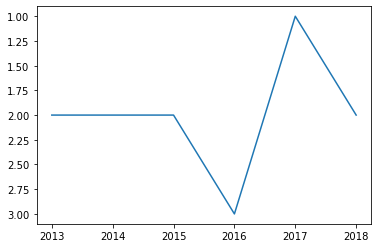

In [25]:
def one_line_chart(coaster_id, park_id, df_rank):
  el_toro = df_rank[(df_rank.Name == coaster_id) & (df_rank.Park == park_id)]
  
  fig, ax = plt.subplots()
  rank = el_toro["Rank"]
  time = el_toro["Year of Rank"]
  plt.plot(time, rank)
  ax.invert_yaxis()
  plt.show()
    
one_line_chart("El Toro", "Six Flags Great Adventure", wood_rank)

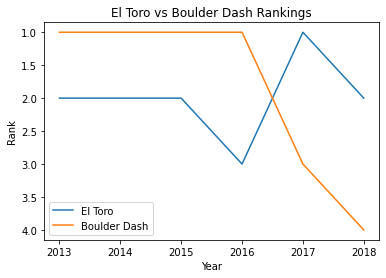

In [24]:
def two_line_chart(coaster_id_1, park_id_1, coaster_id_2, park_id_2, df_rank):

  coaster_rank_1 = df_rank[(df_rank['Name'] == coaster_id_1) & (df_rank['Park'] == park_id_1)]
  coaster_rank_2 = df_rank[(df_rank['Name'] == coaster_id_2) & (df_rank['Park'] == park_id_2)]

  fig, ax = plt.subplots()
  ax.plot(coaster_rank_1['Year of Rank'],coaster_rank_1['Rank'], label = coaster_id_1)
  ax.plot(coaster_rank_2['Year of Rank'],coaster_rank_2['Rank'], label = coaster_id_2) 

  ax.invert_yaxis()
  plt.title("{} vs {} Rankings".format(coaster_id_1, coaster_id_2))
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.legend()
  plt.show()

two_line_chart('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce',wood_rank)


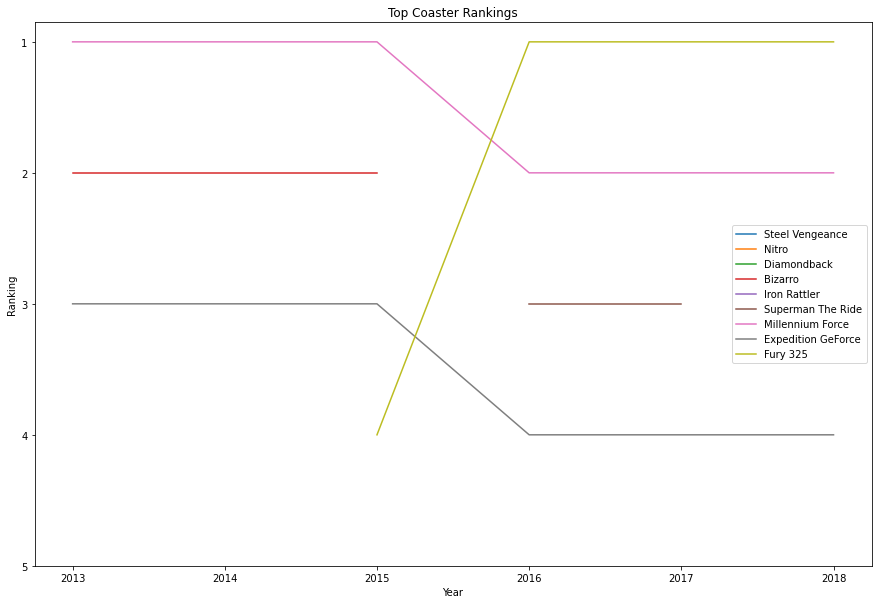

In [9]:
def top_n_coasters(n, coaster_rank):
  top_n_rank = coaster_rank[coaster_rank["Rank"] <= n]

  fig, ax=plt.subplots(figsize = (15,10))

  for n_rank in set(top_n_rank["Name"]):
    n_ranking = top_n_rank[top_n_rank["Name"] == n_rank]
    ax.plot(n_ranking["Year of Rank"], n_ranking["Rank"], label = n_rank)
  ax.set_yticks([1,2,3,4,5])
  ax.invert_yaxis()
  plt.title("Top Coaster Rankings")
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc=7)
  plt.show()
  
top_n_coasters(4, steel_rank)

In [10]:
roller_coasters = pd.read_csv("roller_coasters.csv")
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


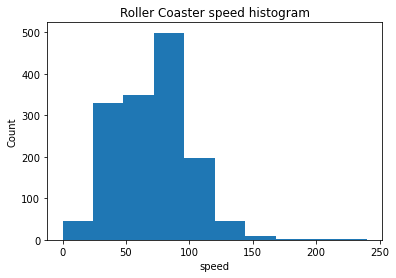

In [11]:
def plot_histogram(df_name, column_name):
  column_data = df_name[column_name]
  plt.hist(column_data.dropna())
  plt.title("Roller Coaster {}".format(column_name) + " histogram")
  plt.xlabel(column_name)
  plt.ylabel("Count")
  plt.show()

plot_histogram(roller_coasters, "speed")

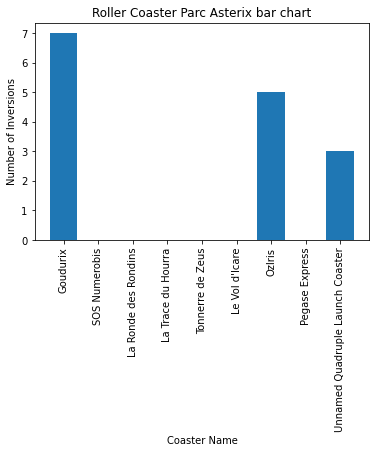

In [12]:
def plot_bar_chart(df_name, selected_park):
  park_df = df_name[df_name["park"] == selected_park]
  coaster_name = park_df["name"]
  coaster_num_inversions = park_df["num_inversions"]

  ax1 = plt.subplot()
  plt.bar(range(len(coaster_name)), coaster_num_inversions)
  plt.title("Roller Coaster {}".format(selected_park) + " bar chart")
  
  ax1.set_xticks(range(len(coaster_name)))
  ax1.set_xticklabels(coaster_name, rotation = 90)
  plt.xlabel("Coaster Name")
  plt.ylabel("Number of Inversions")
  plt.show()
 
plot_bar_chart(roller_coasters, "Parc Asterix")

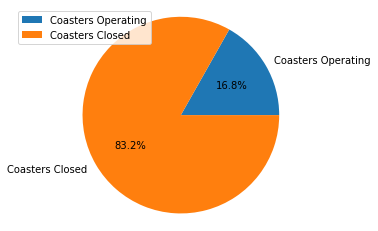

In [14]:
def pie_chart(df_name):
  status_count = df_name.groupby("status").name.count().reset_index()
  operating_count = status_count[(status_count.status == "status.operating") | 
                                 (status_count.status == "status.closed.definitely")]
  plt.pie(operating_count.name, labels = ['Coasters Operating', 'Coasters Closed'], autopct = '%0.1f%%')
  plt.axis('equal')
  plt.legend()
  plt.show()

pie_chart(roller_coasters)

In [16]:
roller_coasters = roller_coasters[roller_coasters['height'] < 140]

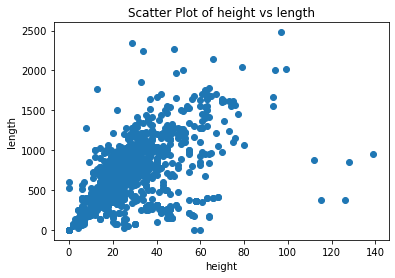

In [19]:
def scatter_plot(df_name, column_one, column_two):
  plt.scatter(df_name[column_one], df_name[column_two])
  plt.title('Scatter Plot of {} vs {}'.format(column_one,column_two))
  plt.xlabel(column_one)
  plt.ylabel(column_two)
  plt.show()
scatter_plot(roller_coasters, "height", "length")